# Assignment 6:  Due Thursday 10/10

In this assignment you will become familiar with the Pandas library through the exploration of a Nobel prize data set. 

This data set was taken from the Kaggle website (https://www.kaggle.com/). If you are interested in data science and / or analysis, this website offers tons of data sets in various formats that you can access. They even post compititions that you can enter, some with money prizes awarded.

The libraries needed for this assignment are listed below.

In [66]:
#specify imports here
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import chi2
from scipy.special import gammaincc
import scipy.integrate as spi
from scipy.optimize import curve_fit
from scipy.integrate import quad
%matplotlib inline

#sorry i kind of just keep copying all the imports from the prevous assignment and adding on

# 1a)

Read in the data set 'data/nobel.csv' into a DataFrame using Pandas .

In [67]:
nobel_data = pd.read_csv('nobel.csv')
print(nobel_data.head())

   year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  laureate_id  \
0  "in recognition of the extraordinary services ...         1/1          160   
1  "in special recognition of his poetic composit...         1/1          569   
2  "for his work on serum therapy, especially its...         1/1          293   
3                                                NaN         1/2          462   
4                                                NaN         1/2          463   

  laureate_type                     full_name  birth_date         birth_city  \
0    I

# 1b)

Display below the output from the DataFrame functions *info*.

In [68]:
nobel_data_info = nobel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

# 1c)

Show the first 5 listings of the dataset.

In [69]:
print(nobel_data.head())

   year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  laureate_id  \
0  "in recognition of the extraordinary services ...         1/1          160   
1  "in special recognition of his poetic composit...         1/1          569   
2  "for his work on serum therapy, especially its...         1/1          293   
3                                                NaN         1/2          462   
4                                                NaN         1/2          463   

  laureate_type                     full_name  birth_date         birth_city  \
0    I

# Problem 2

How many null ('NaN') values there are in each *catagory*? What is the total number of Null values in the DataFrame?

In [70]:
#number of null values in each column
null_counts = nobel_data.isnull().sum()

#total number of null values
total_nulls = null_counts.sum()

print("Null values in each category:")
print(null_counts)
print(f"\nTotal number of null values in the DataFrame: {total_nulls}")

Null values in each category:
year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                      26
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
dtype: int64

Total number of null values in the DataFrame: 1912


# Problem 3

Make a histogram of the number of nobel prizes awarded per year. Around which decade (1900, 1910, 1920, ...) were the least amount of prizes awarded?

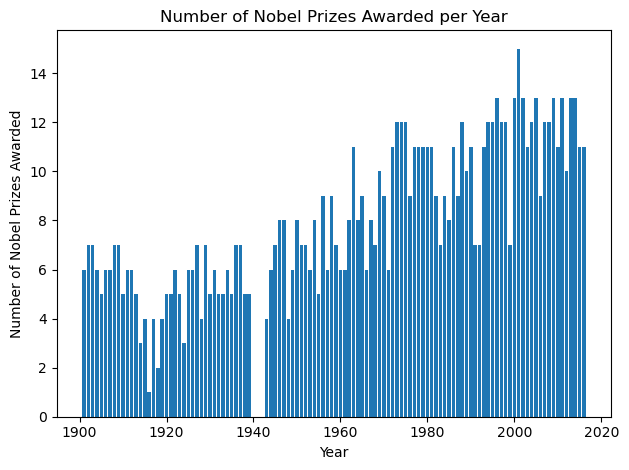

The decade with the least amount of Nobel Prizes awarded is: 1910s, with 40 prizes.


In [71]:
#number of Nobel Prizes awarded / year
prizes_per_year = nobel_data['year'].value_counts().sort_index()

#histogram
plt.figure()
plt.bar(prizes_per_year.index, prizes_per_year.values)

plt.xlabel('Year')
plt.ylabel('Number of Nobel Prizes Awarded')
plt.title('Number of Nobel Prizes Awarded per Year')
plt.tight_layout()
plt.show()

#prizes / decade
prizes_per_decade = prizes_per_year.groupby(prizes_per_year.index // 10 * 10).sum()

#decade with the least amount of prizes awarded
least_awarded_decade = prizes_per_decade.idxmin()
least_awarded_count = prizes_per_decade.min()

print(f"The decade with the least amount of Nobel Prizes awarded is: {least_awarded_decade}s, with {least_awarded_count} prizes.")

# Problem 4

Use groupby method to printout the number of prizes awarded to each category. Which categroy has the most prizes?

In [72]:
#group by category
prizes_per_category = nobel_data.groupby('category').size()
print("Number of prizes awarded to each category:")
print(prizes_per_category)


#most prizes
most_awarded_category = prizes_per_category.idxmax()

print(f"\nThe category with the most prizes is: '{most_awarded_category}' with 211 prizes.")

Number of prizes awarded to each category:
category
Chemistry     175
Economics      78
Literature    113
Medicine      211
Peace         130
Physics       204
dtype: int64

The category with the most prizes is: 'Medicine' with 211 prizes.


# Problem 5

Find percentage of the prizes were awarded to 1, 2, 3, and 4 people? Meaning what percentage of 1/1, 1/2, 1/3, and 1/4 prize_shares are there?

In [73]:
#group by category
prizes_per_share = nobel_data.groupby('prize_share').size()

#number
p1 = prizes_per_share.get(0, 0)  
p2 = prizes_per_share.get(1, 0) 
p3 = prizes_per_share.get(2, 0)  
p4 = prizes_per_share.get(3, 0) 

#percent 
total_prizes = len(nobel_data)
p1p = p1*100 / total_prizes
p2p = p2*100 / total_prizes
p3p = p3*100 / total_prizes
p4p = p4*100 / total_prizes

print(f"Percent of prizes awarded to 1 person: {p1p}")
print(f"Percent of prizes awarded to 2 people: {p2p}")
print(f"Percent of prizes awarded to 3 people: {p3p}")
print(f"Percent of prizes awarded to 4 people: {p4p}")


Percent of prizes awarded to 1 person: 37.76070252469813
Percent of prizes awarded to 2 people: 33.589462129527995
Percent of prizes awarded to 3 people: 22.063666300768386
Percent of prizes awarded to 4 people: 6.586169045005488


/var/folders/1j/bxppz8y50sd79350chcxl0b40000gn/T/ipykernel_60735/2301520638.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p1 = prizes_per_share.get(0, 0)
/var/folders/1j/bxppz8y50sd79350chcxl0b40000gn/T/ipykernel_60735/2301520638.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p2 = prizes_per_share.get(1, 0)
/var/folders/1j/bxppz8y50sd79350chcxl0b40000gn/T/ipykernel_60735/2301520638.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.i

# Problem 6

Determine how many males and females won the prize. Does the sum of male and female prizes add up to the total entries? If not, why?

On the same graph make histograms for the numbber of males and females that won the prize each year. 

Number of Male and Female Winners:
sex
Male      836
Female     49
Name: count, dtype: int64

Total entries: 911
Sum of male and female winners: 885
The counts do not add up to the total entries.
Some winners may not have a recorded gender
Prizes won by multiple people may not include gender.
Some entries may be for organizations not individual people


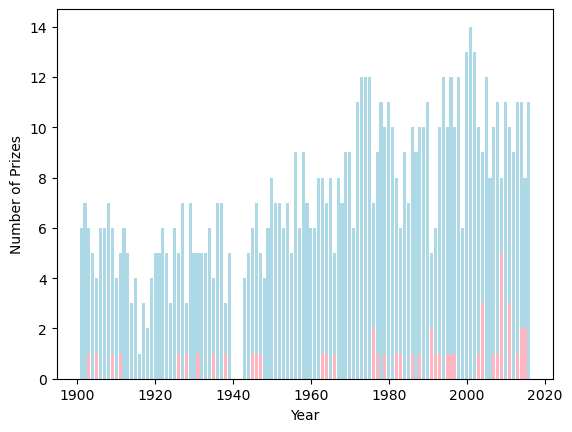

In [74]:
#number of male and female winners
gender_counts = nobel_data['sex'].value_counts() 
print("Number of Male and Female Winners:")
print(gender_counts)

#total entries
total_entries = len(nobel_data)

#add up to total entries?
sum_gender_counts = gender_counts.sum()
print(f"\nTotal entries: {total_entries}")
print(f"Sum of male and female winners: {sum_gender_counts}")

print("The counts do not add up to the total entries.")
print("Some winners may not have a recorded gender")
print("Prizes won by multiple people may not include gender.")
print("Some entries may be for organizations not individual people")

#year and gender
gender_year_counts = nobel_data.groupby(['year', 'sex']).size().unstack(fill_value=0)

#histogram
plt.figure()
plt.bar(gender_year_counts.index,gender_year_counts['Male'], color='lightblue')
plt.bar(gender_year_counts.index,gender_year_counts['Female'],color='lightpink')

plt.xlabel('Year')
plt.ylabel('Number of Prizes')
plt.show()


# Problem 7

How many prizes were won by those whose birth country was United States of America?

In [76]:
usa_prizes = nobel_data[nobel_data['birth_country'] == 'United States of America']
number_of_usa_prizes = len(usa_prizes)

print(f"Nobel Prizes awarded to those whose birth country was United States of America: {number_of_usa_prizes}")


Nobel Prizes awarded to those whose birth country was United States of America: 259


# Problem 8

Determine the age that each of the prize winners was when they won the prize. Find the youngest and oldest to win the prize. Find the mean age to win the prize, and the standard deviation of it. Make a histogram of the age each person was when they won the prize.

### Hint: You can use Pandas DatetimeIndex method to extract the year from the date format yyyy-mm-dd
> pd.DatetimeIndex(date).year

Where *date* is given in a formate like year-month-day, the above will returen the year, hence the *.year* in the call above. Use 'shit+tab' on pandas.DatetimeIndex to learn more.

Youngest prize winner age: 17.0
Oldest prize winner age: 90.0
Mean age: 59.45
Standard deviation of age: 12.40


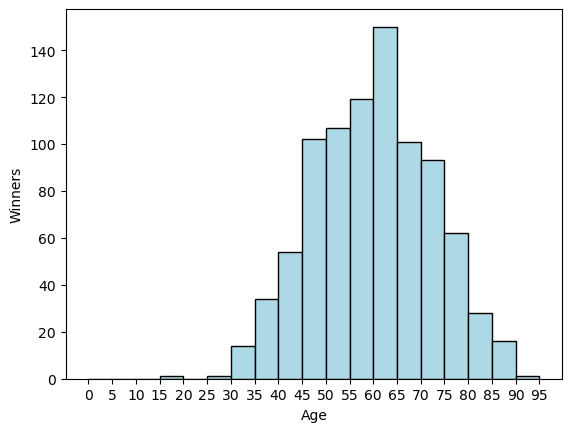

In [83]:
#calculate age
nobel_data['birth_year'] = pd.DatetimeIndex(nobel_data['birth_date']).year
nobel_data['age'] = nobel_data['year'] - nobel_data['birth_year']  

# Find the youngest and oldest prize winners
youngest_age = nobel_data['age'].min()
oldest_age = nobel_data['age'].max()

#mean and standard deviation
mean = nobel_data['age'].mean()
sd = nobel_data['age'].std()

print(f"Youngest prize winner age: {youngest_age}")
print(f"Oldest prize winner age: {oldest_age}")
print(f"Mean age: {mean:.2f}")
print(f"Standard deviation of age: {sd:.2f}")

#histogram
plt.figure()
plt.hist(nobel_data['age'], bins=range(0, 100, 5), color='lightblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Winners')
plt.xticks(range(0, 100, 5))
plt.show()

# Problem 9

Make a copy of the current DataFrame. Then drop the column *lauret_id* from the copied DataFrame (do this inplace so this column is gone).

In [90]:
#copy DataFrame
nobel_data_copy = nobel_data.copy()

#drop 'laureate_id' column 
nobel_data_copy.drop(columns=['laureate_id'], inplace=True)

#check
print(nobel_data_copy.head()) 


   year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name  birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff  1852-08-30          Rotterdam   
1   

# Problem 10

Add the age column you calculated in Problem 8 to the DataFrame.

In [91]:
#add age
nobel_data_copy['age'] = nobel_data['age']

#check
print(nobel_data_copy.head()) 


   year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name  birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff  1852-08-30          Rotterdam   
1   